In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df1 = pd.read_csv(mouse_drug_data)
df2 = pd.read_csv(clinical_trial_data)

# Combine the data into a single dataset
df3 = pd.merge(df2,df1,on="Mouse ID",how="left")

# Display the data table for preview
df3.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tv = df3.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()
mean_tv

# Convert to DataFrame
df_mean_tv = pd.DataFrame(mean_tv).reset_index()
# Preview DataFrame
df_mean_tv

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
se_tv = df3.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()
se_tv
# Convert to DataFrame
df_se_tv = pd.DataFrame(se_tv).reset_index()
# Preview DataFrame
df_se_tv


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [58]:
# Minor Data Munging to Re-Format the Data Frames
mean_tv = df3.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()
mean_data_df = pd.DataFrame(mean_tv)\
    .reset_index()\
    .pivot(index="Timepoint", columns = "Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked
mean_data_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:
#Standard Error of Tumor Volume
se_tv = df3.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()
se_tv_df = pd.DataFrame(se_tv)\
    .reset_index()\
    .pivot(index="Timepoint", columns = "Drug")["Tumor Volume (mm3)"]
se_tv_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


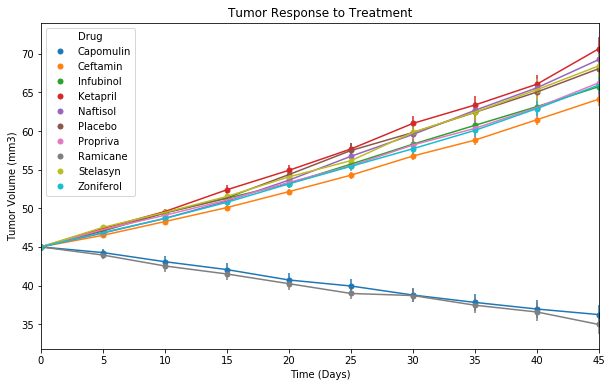

In [26]:
# Generate the Plot (with Error Bars)
t_p = mean_data_df\
    .plot(figsize=(10,6)\
    , yerr = se_tv_df\
    , legend = False)

t_p.set_prop_cycle(None)

mean_data_df\
    .plot(figsize=(10,6)\
    , style=["o","o","o","o","o","o","o","o","o","o"]\
    , markersize=5, ax = t_p)

t_p.set_ylabel("Tumor Volume (mm3)")
t_p.set_xlabel("Time (Days)")
#Not sure why this or .xlabel() didn't work^^

t_p.set_title("Tumor Response to Treatment")
# Save the Figure
plt.show()


## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met = df3.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
mean_met_df = pd.DataFrame(mean_met)

# Preview DataFrame
mean_met_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
...                               ...
Zoniferol 25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
se_met = df3.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()
# Convert to DataFrame
se_met_df = pd.DataFrame(se_met)
# Preview DataFrame
se_met_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
...                               ...
Zoniferol 25                 0.236621
          30                 0.248168
          35                 0.285714
          40                 0.299791
          45                 0.286400

[100 rows x 1 columns]

In [9]:
# Minor Data Munging to Re-Format the Data Frames
mean_metast = df3.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()
mean_metast_df = pd.DataFrame(mean_metast)\
    .reset_index()\
    .pivot(index="Timepoint", columns = "Drug")["Metastatic Sites"]

# Preview that Reformatting worked
mean_metast_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [10]:
# Standard Error of Metastatic Sites
se_metast = df3.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()
se_metast_df = pd.DataFrame(se_metast)\
    .reset_index()\
    .pivot(index="Timepoint", columns = "Drug")["Metastatic Sites"]
se_metast_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


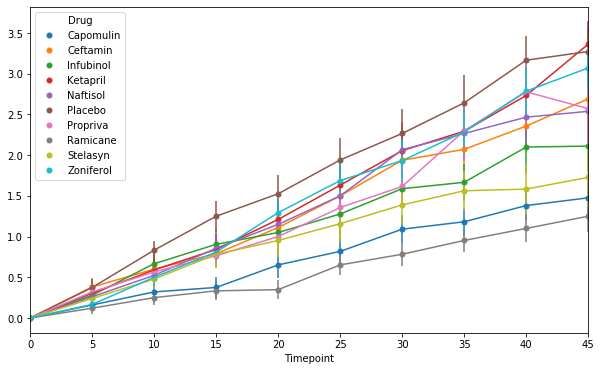

In [31]:
# Generate the Plot (with Error Bars)
m_p = mean_metast_df\
    .plot(figsize=(10,6)\
    , yerr = se_metast_df\
    , legend = False)

m_p.set_prop_cycle(None)

mean_metast_df\
    .plot(figsize=(10,6)\
    , style=["o","o","o","o","o","o","o","o","o","o"]\
    , markersize=5, ax = m_p)

t_p.set_ylabel("Met. Sites")
t_p.set_xlabel("Treatment Duration (Days)")
t_p.set_title("Metastatic Spread During Treatment")
t_p.grid(linestyle='-', linewidth=1)

#These four lines won't work?^

# Save the Figure
plt.show()

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
sr_df1 = pd.DataFrame()
sr_df1["Mouse ID"] = df3["Mouse ID"]
sr_df1["Drug"] = df3["Drug"]
sr_df1["Timepoint"] = df3["Timepoint"]
sr_df1

# Convert to DataFrame
mouse_count = sr_df1.groupby(["Drug", "Timepoint"])["Mouse ID"].count()
sr_df2 = pd.DataFrame(mouse_count)\
    .reset_index()\
    .rename(columns={"Mouse ID": "Mouse Count"})

# Preview DataFrame
sr_df2

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [14]:
# Minor Data Munging to Re-Format the Data Frames

sr_df3 = pd.DataFrame(mouse_count)\
    .reset_index()\
    .pivot(index="Timepoint", columns = "Drug")["Mouse ID"]\
    .rename(columns={"Mouse ID": "Mouse Count"})

# Preview the Data Frame
sr_df3

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


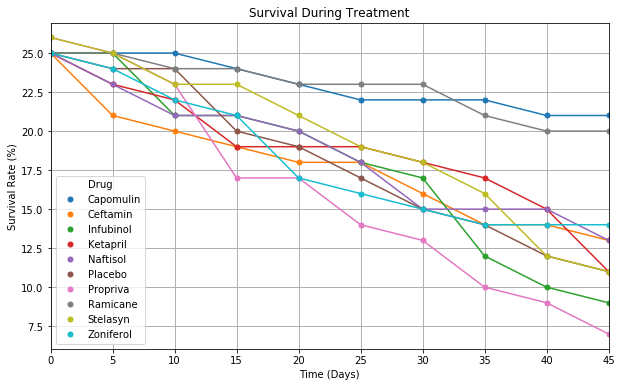

In [29]:
sr_p = sr_df3\
    .plot(figsize=(10,6)\
    , legend = False)

sr_p.set_prop_cycle(None)

sr_df3\
    .plot(figsize=(10,6)\
    , style=["o","o","o","o","o","o","o","o","o","o"]\
    , markersize=5, ax = sr_p)

sr_p.grid(linestyle='-', linewidth=1)

sr_p.set_ylabel("Survival Rate (%)")
sr_p.set_xlabel("Time (Days)")
sr_p.set_title("Survival During Treatment")

# Save the Figure
plt.show()

## Summary Bar Graph

In [158]:
# Calculate the percent changes for each drug
#mean_data_df["Capomulin"].pct_change(periods=9).round(2)

summary_df = mean_data_df.pct_change(periods=9)

capomulin_s = summary_df.loc[45, "Capomulin"]*100
ceftamin_s = summary_df.loc[45, "Ceftamin"]*100
infubinol_s = summary_df.loc[45, "Infubinol"]*100
ketapril_s = summary_df.loc[45, "Ketapril"]*100
naftisol_s = summary_df.loc[45, "Naftisol"]*100
placebo_s = summary_df.loc[45, "Placebo"]*100
propriva_s = summary_df.loc[45, "Propriva"]*100
ramicane_s = summary_df.loc[45, "Ramicane"]*100
stelasyn_s = summary_df.loc[45, "Stelasyn"]*100
zoniferol_s = summary_df.loc[45, "Zoniferol"]*100

summary_dict = ({
    "Capomulin":[capomulin_s], 
    "Ceftamin":[ceftamin_s],
    "Infubinol":[infubinol_s],
    "Ketapril":[ketapril_s],
    "Naftisol":[naftisol_s],
    "Placebo":[placebo_s],
    "Propriva":[propriva_s],
    "Ramicane":[ramicane_s],
    "Stelasyn":[stelasyn_s],
    "Zoniferol":[zoniferol_s]
})
summary_index = ['Capomulin','Ceftamin','Infubinol','Ketapril'\
                 ,'Naftisol','Placebo' ,'Propriva','Ramicane'\
                 ,'Stelasyn','Zoniferol']

summary_series = pd.Series(summary_dict, index=summary_index)

summary_df2 = pd.DataFrame(summary_series).reset_index().set_index('index').rename(columns = {"[0]":"Percent Change"})

length=np.arange(len(summary_df2[0]))

# Display the data to confirm
summary_df2

,0
index,
Capomulin,[-19.47530266789417]
Ceftamin,[42.51649185589741]
Infubinol,[46.12347172785185]
Ketapril,[57.02879468660606]
Naftisol,[53.92334713476923]
Placebo,[51.29796048315151]
Propriva,[47.24117486320634]
Ramicane,[-22.32090046276667]
Stelasyn,[52.08513428789896]


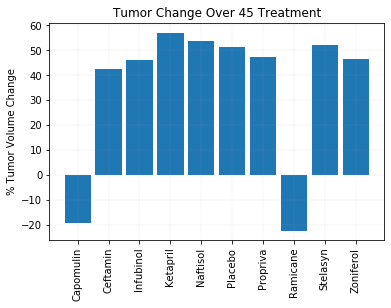

In [193]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs

summary_plt = plt.bar(summary_index, summary_df2[0], width=.85)
plt.figsize=(18,14)
plt.xticks(rotation="vertical")
plt.title("Tumor Change Over 45 Treatment")
plt.ylabel("% Tumor Volume Change")
plt.grid(linestyle='-', linewidth=.1)

# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes

#>>>>>> I Really Need Help On This Part -- Also graph size won't change

# Call functions to implement the function calls

# Save the Figure

# Show the Figure
plt.show()